In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/column_2C_weka.csv')

In [ ]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
df.duplicated().sum()

0

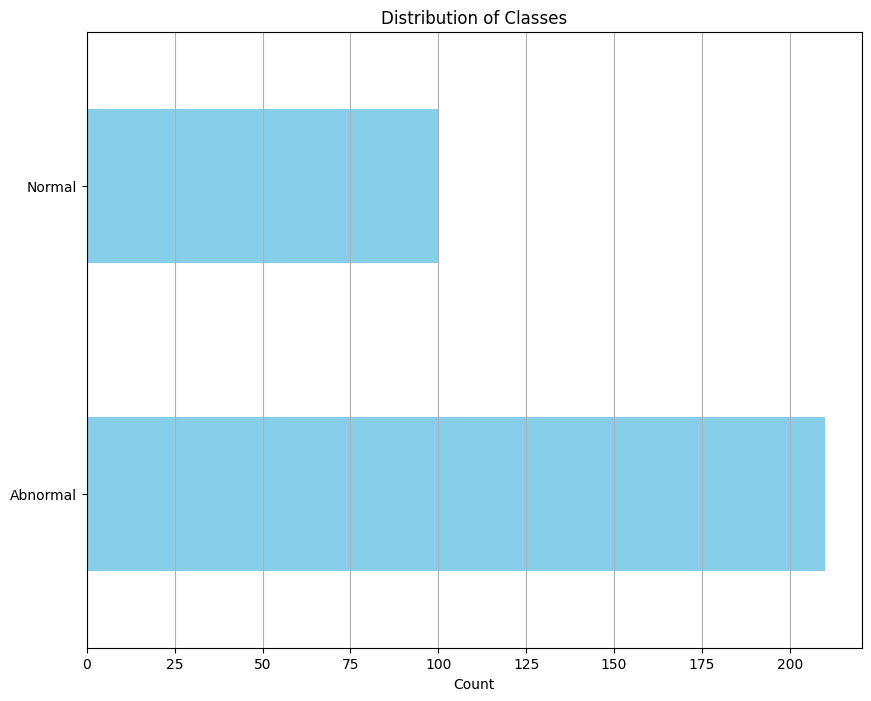

In [ ]:
class_counts = df['class'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 8))
class_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.title('Distribution of Classes')
plt.grid(axis='x')
plt.show()

In [ ]:
x_data = df.drop(["class"], axis=1)
df['class'] = df['class'].replace({'Abnormal': 1, 'Normal': 0})
y = df["class"].values

In [ ]:
#min max
X=(x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state = 15)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("knn score accuracy : {}",knn.score(x_test,y_test))

knn score accuracy : {} 0.7872340425531915


In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
print("test accuracy : { }",svm.score(x_test,y_test))

test accuracy : { } 0.851063829787234


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("test accuracy {}",nb.score(x_test,y_test))

test accuracy {} 0.7446808510638298


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr.fit(x_train,y_train)
print("test accuracy {}",tr.score(x_test,y_test))

test accuracy {} 0.8085106382978723


In [ ]:
from sklearn.ensemble import RandomForestClassifier
eb = RandomForestClassifier()
eb.fit(x_train,y_train)
print("test accuracy {}",eb.score(x_test,y_test))

test accuracy {} 0.851063829787234


<Axes: >

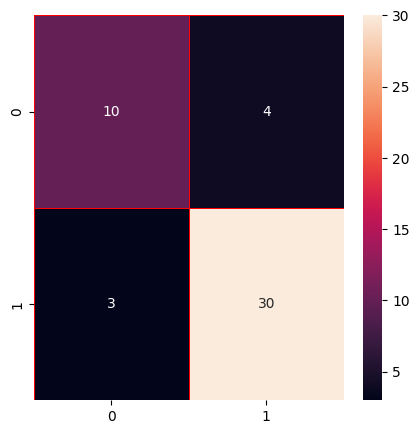

In [ ]:
y_pred = eb.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix,accuracy_score
mt = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(mt,annot = True,linewidths = 0.5,linecolor = "red",fmt = ".0f",ax=ax)

In [ ]:
accuracy_score(y_test,y_pred)

0.851063829787234